<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [8]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [23]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1 - Familiarize yourself with the dataset 
##### 1.1. Taking a look at the top 5 rows to learn more about how it is composed

In [5]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


##### 1.2. Learning the type of variables 

In [6]:
boston_df.describe()
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


##### 1.3. Variables

###### CRIM - per capita crime rate by town
###### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
###### INDUS - proportion of non-retail business acres per town.
###### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
###### NOX - nitric oxides concentration (parts per 10 million)
###### RM - average number of rooms per dwelling
###### AGE - proportion of owner-occupied units built prior to 1940
###### DIS - weighted distances to five Boston employment centres
###### RAD - index of accessibility to radial highways
###### TAX - full-value property-tax rate per $10,000
###### PTRATIO - pupil-teacher ratio by town
###### LSTAT - % lower status of the population
###### MEDV - Median value of owner-occupied homes in thousands

#### Task 2 - Generate Descriptive Statistics and Visualizations
##### 2.1. "Median value of owner-occupied homes" - Boxplot

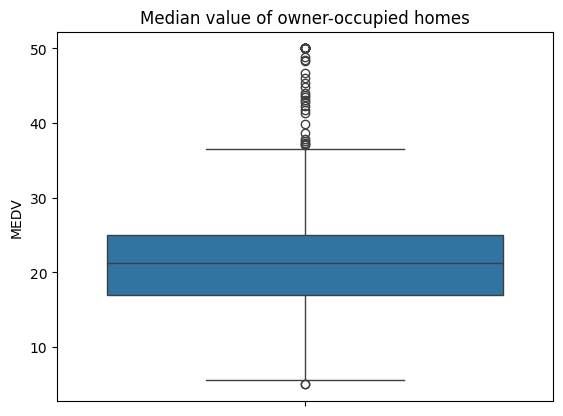

In [10]:
ax_1 = sns.boxplot(y='MEDV', data=boston_df)
ax_1.set_title('Median value of owner-occupied homes')
pyplot.show()

##### 2.2. "Charles river variable" - Countplot

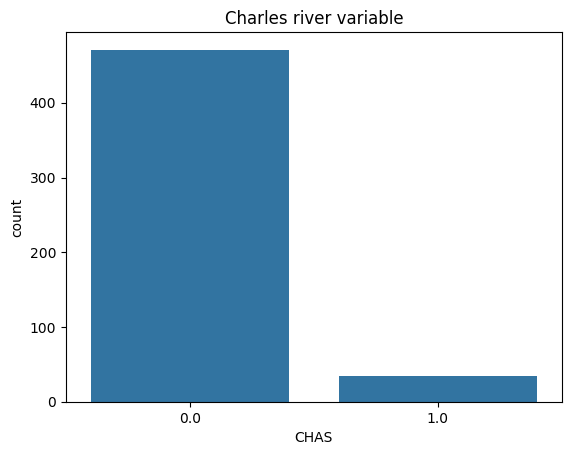

In [11]:
ax_2 = sns.countplot(x="CHAS", data=boston_df)
ax_2.set_title('Charles river variable')
pyplot.show()

##### 2.3. "MEDV variable vs the AGE variable" - Boxplot: discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older

In [15]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

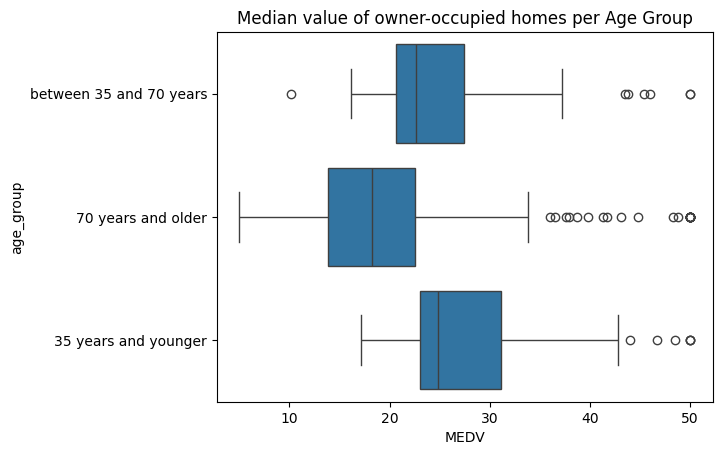

In [16]:
ax_3 = sns.boxplot(x = 'MEDV', y = 'age_group', data = boston_df)
ax_3.set_title('Median value of owner-occupied homes per Age Group')

##### 2.4. "relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town" - Scatterplot

Text(0.5, 1.0, 'Nitric oxide concentration per proportion of non-retail business acres per town')

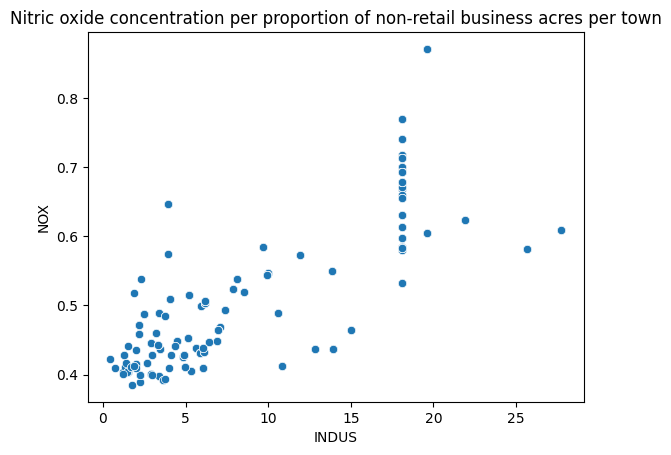

In [17]:
ax_4 = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
ax_4.set_title('Nitric oxide concentration per proportion of non-retail business acres per town')

Conclusion: a higher proprtion of non-retail business acres per town produces a higher concentration of Nitric oxide.

##### 2.5. Pupil to teacher ratio variable - Histogram

Text(0.5, 1.0, 'Pupil to teacher ratio per town')

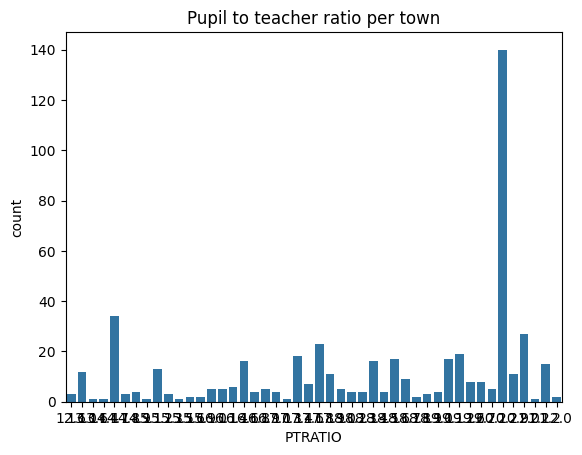

In [18]:
ax_5 = sns.countplot(x = 'PTRATIO', data = boston_df)
ax_5.set_title('Pupil to teacher ratio per town')

#### Task 3 - Statistics Tests
##### 3.1. T-test for independent samples - Is there a significant difference in median value of houses bounded by the Charles river or not

Null Hypothesis: There is no significant difference in median value between houses bounded and not bounded by the Charles River.

Alternative Hypothesis: There is significant difference in median value between houses bounded and not bounded by the Charles River.

α = 0.05

In [19]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'])

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: since the p-value is less than 0.05, we reject the Null Hypothesis, meaning there is a statistical difference in median value betwenn houses near the Charles River and houses far away.

##### 3.2. ANOVA - Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

Null Hypothesis: There is no significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

Alternative Hypothesis: There is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

α = 0.05

In [25]:
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table=sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Conclusion: since the p-value is less than 0.05, we reject the Null Hypothesis, meaning there is significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).

##### 3.3. Pearson Correlation - Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Null Hypothesis: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

Alternative Hypothesis: There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

α = 0.05

In [27]:
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion: since the p-value is less than 0.05, we reject the Null Hypothesis, meaning there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

##### 3.4. Regression - What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

In [ ]:
Null Hypothesis: There is no impact on additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

Alternative Hypothesis: There is impact on additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes.

α = 0.05

In [28]:
## X = independent variable
x = boston_df['DIS']

## Y = dependent variable
y=boston_df['MEDV']

## adding an intercept to our model
x=sm.add_constant(x)

model=sm.OLS(y,x).fit()
predictions = model.predict(x)

## printing statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        13:53:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""